In [ ]:
#Descarga de Indices
import pandas_datareader.data as web
indices_tickers =["^IBEX","^GSPC","^DJI","^IXIC","^N225","^KS11","XIU.TO","^HSI","^MXX","^VIX"]

def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

indices_data = get_adj_closes(indices_tickers,start_date="2019-12-31",end_date="2020-03-30")
indices_data = indices_data[0:-1]

In [ ]:
indices_data

In [ ]:
indices_data.plot()

In [ ]:
import numpy as np
log_indices = np.log(indices_data)
log_indices.plot()

In [ ]:
rend_indices = indices_data.pct_change()
rend_indices.plot()

In [ ]:
oil_data = get_adj_closes("CL=F",start_date="2019-12-01",end_date="2020-03-30")
oil_data.plot()

In [ ]:
rend_oil = oil_data.pct_change()
rend_oil.plot()

In [ ]:

a = np.array(indices_data.index)
b = np.array(indices_data['^VIX'])
plt.xticks(rotation=90)
plt.plot(a,b,'b')
plt.show()

In [ ]:
#TRABJA DE AQUI PA BAJO NOE

# Analisis COVID-19 vs Stock Market
El índice VIX también se conoce comúnmente como índice de sentimiento del inversor, índice del miedo, índice VIX, cboe VIX o S&P500 VIX.

Pero, ¿qué información aporta el índice VIX? El VIX mide la volatilidad del mayor índice bursátil estadounidense, el S&P, que incluye 500 empresas, lo que lo convierte en un índice psicológico.

En los mercados, la volatilidad representa confianza o miedo.

Cuando el VIX tiende a 0, refleja un sentimiento de confianza de los inversores en la economía estadounidense.
Cuando el VIX tiende a 100, refleja pesimismo o miedo por parte de estos mismos inversores.
Hay tres niveles de alcance en el VIX cboe:

Entre 0 y 20: hay poca volatilidad en el mercado, los inversores tienen confianza y el S&P500 está en principio en tendencia alcista.
Entre 20 y 30: los inversores empiezan a preocuparse, lo que conduce a la volatilidad, la tendencia al alza del SP500 puede continuar pero también comenzar a revertirse.
Entre 30 y 100: ¡es el pánico por parte de los inversores! La volatilidad es particularmente alta y probablemente estamos asistiendo a una fuerte corrección o incluso a un colapso de los precios del SP500 y de los principales índices bursátiles.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.dates as mdates
import datetime
%matplotlib inline

In [ ]:
data = pd.read_csv('C:/Users/1295779/Desktop/ITESO/6to/Simulacion de procesos financieros/Proyecto_SIMFIN/full_data.csv',index_col = 'location')
data_bk = pd.DataFrame(data)
data = pd.DataFrame(data)

In [ ]:
def data_pais(pais):
    data_pais = pd.DataFrame(data.loc[pais])
    data_pais['date'] = pd.to_datetime(data_pais.date)
    return data_pais


In [ ]:
USA = data_pais('United States')
WRL = data_pais('World')


In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Tiempo')
ax1.set_ylabel('Precio', color=color)
ax1.plot(indices_data.index, indices_data['^VIX'], color=color,label = 'VIX')
plt.legend(loc='center left')
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation = 90)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Casos COVID-19 Confirmados', color=color)  # we already handled the x-label with ax1
ax2.plot(USA['date'],USA['total_cases'], color=color,label = 'COVID-19')
ax2.tick_params(axis='y', labelcolor=color)


plt.legend(loc='upper left')
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

In [ ]:
%matplotlib notebook
title = 'COVID-19'
x = np.array(USA['date'])
y = np.array(USA['total_cases'])
overdose = pd.DataFrame(y,x)
overdose.columns = {title}
overdose

In [ ]:
def animate(i):
    data = overdose.iloc[:int(i+1)] #select data range
    p = sns.lineplot(x=data.index, y=data[title], data=data, color="r")
    p.tick_params(labelsize=10)
    plt.setp(p.lines,linewidth=7)

In [ ]:
fig = plt.figure(figsize=(10,6))
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=100, repeat=True)



plt.ylim(np.min(overdose)[0], np.max(overdose)[0])
plt.xticks(rotation=90)
plt.title('COVID-CASES',fontsize=10)
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web

C:\Users\1295779\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
netflix = web.get_data_yahoo("NFLX",
                            start = "2009-01-01",
                            end = "2018-03-01")
netflix

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-01-02,4.357143,4.200000,4.217143,4.267143,6605200.0,4.267143
2009-01-05,4.562857,4.302857,4.327143,4.562857,13044500.0,4.562857
2009-01-06,4.750000,4.590000,4.591429,4.705714,12065900.0,4.705714
2009-01-07,4.734286,4.571429,4.715714,4.672857,10133900.0,4.672857
2009-01-08,4.797143,4.485714,4.618571,4.735714,8175300.0,4.735714
...,...,...,...,...,...,...
2018-02-23,286.000000,277.809998,281.000000,285.929993,7301800.0,285.929993
2018-02-26,295.649994,287.010010,288.750000,294.160004,10268600.0,294.160004
2018-02-27,297.359985,290.589996,294.769989,290.609985,9416500.0,290.609985


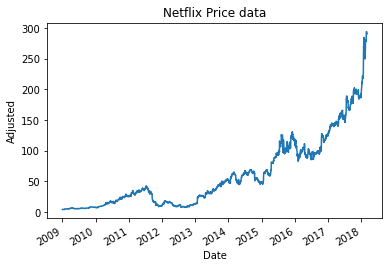

In [3]:
netflix['Adj Close'].plot()
plt.xlabel("Date")
plt.ylabel("Adjusted")
plt.title("Netflix Price data")
plt.show()

In [4]:
netflix_daily_returns = netflix['Adj Close'].pct_change()
netflix_monthly_returns = netflix['Adj Close'].resample('M').ffill().pct_change()

In [5]:
print(netflix_daily_returns.head())

Date
2009-01-02         NaN
2009-01-05    0.069300
2009-01-06    0.031309
2009-01-07   -0.006982
2009-01-08    0.013452
Name: Adj Close, dtype: float64


In [6]:
print(netflix_monthly_returns.head())

Date
2009-01-31         NaN
2009-02-28    0.002767
2009-03-31    0.184327
2009-04-30    0.055685
2009-05-31   -0.129993
Freq: M, Name: Adj Close, dtype: float64


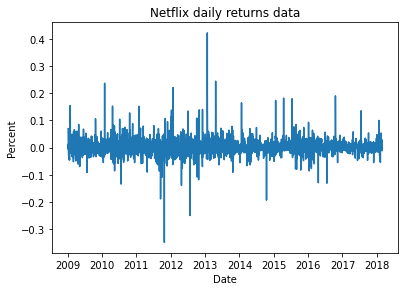

In [7]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(netflix_daily_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Netflix daily returns data")
plt.show()

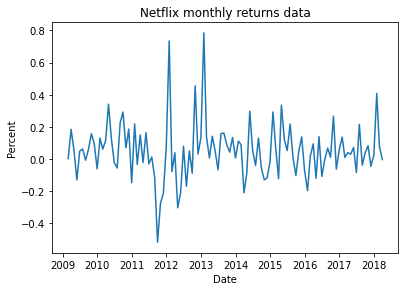

In [8]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(netflix_monthly_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Netflix monthly returns data")
plt.show()

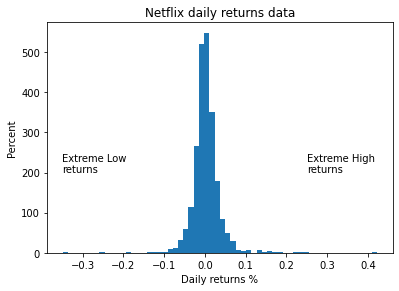

In [9]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
netflix_daily_returns.plot.hist(bins = 60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Netflix daily returns data")
ax1.text(-0.35,200,"Extreme Low\nreturns")
ax1.text(0.25,200,"Extreme High\nreturns")
plt.show()

In [10]:
netflix_cum_returns = (netflix_daily_returns + 1).cumprod()

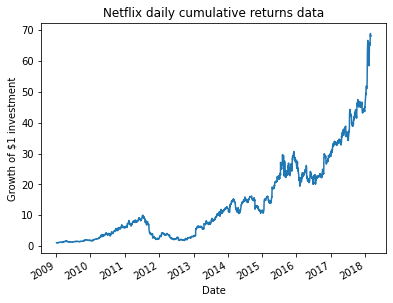

In [11]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
netflix_cum_returns.plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Growth of $1 investment")
ax1.set_title("Netflix daily cumulative returns data")
plt.show()

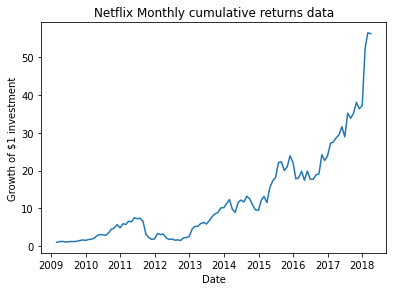

In [12]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
netflix_cum_returns = (netflix_monthly_returns + 1).cumprod()
ax1.plot(netflix_cum_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Growth of $1 investment")
ax1.set_title("Netflix Monthly cumulative returns data")
plt.show()